<a href="https://colab.research.google.com/github/ramyamahesh1126/Clustering/blob/Apriori/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

In [4]:
read_df = pd.read_csv('/content/sample_data/TRAIN-ARULES.csv')


In [5]:
df = read_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12963 entries, 0 to 12962
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      12963 non-null  int64 
 1   user_id       12963 non-null  int64 
 2   product_name  12963 non-null  object
dtypes: int64(2), object(1)
memory usage: 303.9+ KB


In [6]:
Ser = df.groupby('order_id').product_name.nunique()
Ser.describe()

count    1418.000000
mean        9.141749
std         6.524613
min         1.000000
25%         4.000000
50%         8.000000
75%        13.000000
max        46.000000
Name: product_name, dtype: float64

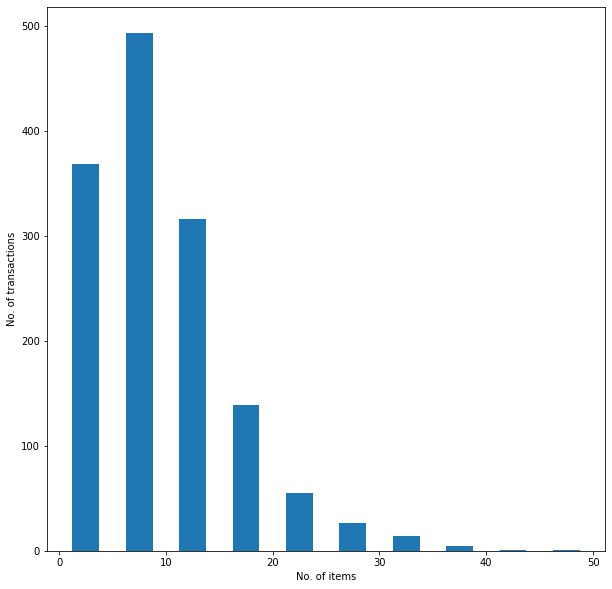

In [7]:
bins = [0,5,10,15,20,25,30,35,40,45,50]
fig = plt.figure(figsize = (10,10))
plt.hist(Ser, bins, histtype = 'bar', rwidth = 0.5)
plt.xlabel('No. of items')
plt.ylabel('No. of transactions')
plt.show()

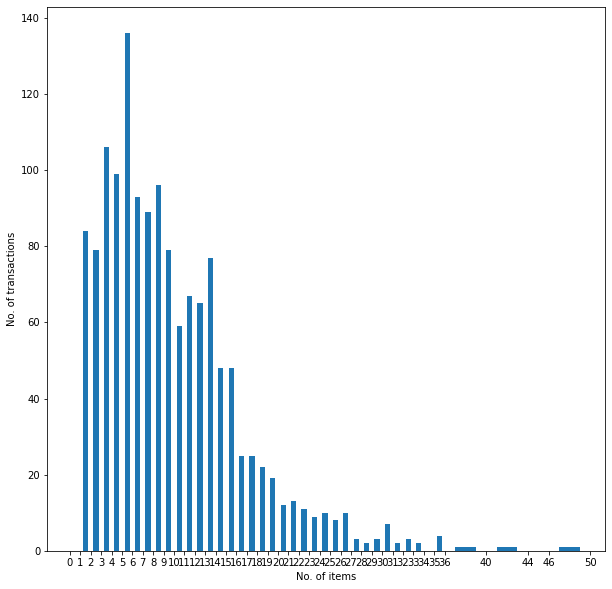

In [8]:
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,40,44,46,50]
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.hist(Ser, bins, histtype = 'bar', rwidth = 0.5)
ax1.set_xticks(bins)
plt.xlabel('No. of items')
plt.ylabel('No. of transactions')
plt.show()

In [9]:
df.head()

,order_id,user_id,product_name
0,1483,90,Organic Pink Lemonade Bunny Fruit Snacks
1,1483,90,Dark Chocolate Minis
2,1483,90,"Sparkling Water, Natural Mango Essenced"
3,1483,90,Peach-Pear Sparkling Water
4,1483,90,Organic Heritage Flakes Cereal


In [10]:
Ser.head()

order_id
1483     12
4595      5
7099     13
8382      9
14400     3
Name: product_name, dtype: int64

In [12]:
basket = df.groupby('order_id')['product_name'].apply(' '.join).reset_index()

In [13]:
df_set = df.groupby(['order_id', 'product_name'])['user_id'].sum().unstack().reset_index().fillna(0).set_index('order_id')

In [14]:
df_set.head()

product_name,0% Fat Free Organic Milk,0% Greek Strained Yogurt,"0% Greek, Blueberry on the Bottom Yogurt",1 Apple + 1 Pear Fruit Bar,1 Liter,1 Step Kashmir Spinach Indian Cuisine,1% Lowfat Milk,1% Milk,100 Calorie Per Bag Popcorn,100% Australian Tea Tree Oil,100% Carrot Juice,100% Florida Orange Juice,100% Grated Parmesan Cheese,100% Guava Juice,100% Juice,100% Juice Apple Juice,"100% Juice, Variety Pack",100% Lactose Free Milk,100% Lactose Free Reduced Fat Calcium Enriched Milk,100% Mango Juice,100% Mighty Mango Juice Smoothie,100% Natural Diced Tomatoes,100% Natural Spring Water,100% Natural Tomato Sauce,100% Orange Juice No Pulp,100% Organic Diced Tomatoes,100% Plant Protein Beastley Sliders,100% Pomegranate Juice,100% Premium Select Not From Concentrate Pure Prune Juice,100% Pure Apple Juice,100% Pure Corn Starch,100% Pure Pumpkin,100% Pure Vegetable Oil,100% Raw Coconut Water,100% Recycled 2 Ply Jumbo Paper Towel Roll,100% Recycled Aluminum Foil,100% Recycled Bath Tissue Rolls,100% Recycled Bathroom Tissue,100% Recycled Paper Towels,100% Whole Grain Corn Meal,...,XL Emerald White Seedless Grapes,XL Pick-A-Size Paper Towel Rolls,Yellow Bell Pepper,Yellow Corn Meal,Yellow Corn Taco Shells,Yellow Corn Tortilla Chips,Yellow Corn Tortillas,Yellow Enriched & Degerminated Corn Meal,Yellow Grape Tomatoes,Yellow Onions,Yellow Potato,Yellow Straightneck Squash,YoBaby Blueberry Apple Yogurt,YoKids Blueberry & Strawberry/Vanilla Yogurt,YoKids Squeeze! Organic Strawberry Flavor Yogurt,"YoKids Squeezers Organic Low-Fat Yogurt, Strawberry",YoKids Strawberry Banana/Strawberry Yogurt,Yobaby Organic Plain Yogurt,Yoghurt Blueberry,Yogurt Pretzels,"Yogurt, Lowfat, Strawberry","Yogurt, Organic, Lowfat, Strawberry","Yogurt, Strained Low-Fat, Coconut",Yotoddler Organic Pear Spinach Mango Yogurt,Yukon Gold Potatoes 5lb Bag,Z Bar Protein Peanut Butter Chocolate Protein Snack Bar,ZBar Organic Chocolate Brownie Energy Snack,ZBar Protein Chocolate Mint Protein Bar,Zen Tea,Zero Calorie Cola,Zero Calorie Cola Soda,Zero Calorie Lemon Lime Soda,Zero Calorie Tonic Water,Zero Go-Go Mixed Berry Vitamin Water,Zero Soda,Zero Vitamin Water,Zero XXX Acai Blueberry Pomegranate,Zucchini Noodles,Zucchini Squash,smartwater® Electrolyte Enhanced Water
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0
8382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_set1 = df.groupby(['order_id', 'product_name'])['order_id'].sum().unstack().reset_index().fillna(0).set_index('order_id')

In [16]:
df_set1.head()

product_name,0% Fat Free Organic Milk,0% Greek Strained Yogurt,"0% Greek, Blueberry on the Bottom Yogurt",1 Apple + 1 Pear Fruit Bar,1 Liter,1 Step Kashmir Spinach Indian Cuisine,1% Lowfat Milk,1% Milk,100 Calorie Per Bag Popcorn,100% Australian Tea Tree Oil,100% Carrot Juice,100% Florida Orange Juice,100% Grated Parmesan Cheese,100% Guava Juice,100% Juice,100% Juice Apple Juice,"100% Juice, Variety Pack",100% Lactose Free Milk,100% Lactose Free Reduced Fat Calcium Enriched Milk,100% Mango Juice,100% Mighty Mango Juice Smoothie,100% Natural Diced Tomatoes,100% Natural Spring Water,100% Natural Tomato Sauce,100% Orange Juice No Pulp,100% Organic Diced Tomatoes,100% Plant Protein Beastley Sliders,100% Pomegranate Juice,100% Premium Select Not From Concentrate Pure Prune Juice,100% Pure Apple Juice,100% Pure Corn Starch,100% Pure Pumpkin,100% Pure Vegetable Oil,100% Raw Coconut Water,100% Recycled 2 Ply Jumbo Paper Towel Roll,100% Recycled Aluminum Foil,100% Recycled Bath Tissue Rolls,100% Recycled Bathroom Tissue,100% Recycled Paper Towels,100% Whole Grain Corn Meal,...,XL Emerald White Seedless Grapes,XL Pick-A-Size Paper Towel Rolls,Yellow Bell Pepper,Yellow Corn Meal,Yellow Corn Taco Shells,Yellow Corn Tortilla Chips,Yellow Corn Tortillas,Yellow Enriched & Degerminated Corn Meal,Yellow Grape Tomatoes,Yellow Onions,Yellow Potato,Yellow Straightneck Squash,YoBaby Blueberry Apple Yogurt,YoKids Blueberry & Strawberry/Vanilla Yogurt,YoKids Squeeze! Organic Strawberry Flavor Yogurt,"YoKids Squeezers Organic Low-Fat Yogurt, Strawberry",YoKids Strawberry Banana/Strawberry Yogurt,Yobaby Organic Plain Yogurt,Yoghurt Blueberry,Yogurt Pretzels,"Yogurt, Lowfat, Strawberry","Yogurt, Organic, Lowfat, Strawberry","Yogurt, Strained Low-Fat, Coconut",Yotoddler Organic Pear Spinach Mango Yogurt,Yukon Gold Potatoes 5lb Bag,Z Bar Protein Peanut Butter Chocolate Protein Snack Bar,ZBar Organic Chocolate Brownie Energy Snack,ZBar Protein Chocolate Mint Protein Bar,Zen Tea,Zero Calorie Cola,Zero Calorie Cola Soda,Zero Calorie Lemon Lime Soda,Zero Calorie Tonic Water,Zero Go-Go Mixed Berry Vitamin Water,Zero Soda,Zero Vitamin Water,Zero XXX Acai Blueberry Pomegranate,Zucchini Noodles,Zucchini Squash,smartwater® Electrolyte Enhanced Water
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7099.0,0.0,0.0,0.0,0.0
8382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
def encode(x):
 if x <= 0:
     return 0
 else:
     return 1
df_set = df_set.applymap(encode)
df_set

product_name,0% Fat Free Organic Milk,0% Greek Strained Yogurt,"0% Greek, Blueberry on the Bottom Yogurt",1 Apple + 1 Pear Fruit Bar,1 Liter,1 Step Kashmir Spinach Indian Cuisine,1% Lowfat Milk,1% Milk,100 Calorie Per Bag Popcorn,100% Australian Tea Tree Oil,100% Carrot Juice,100% Florida Orange Juice,100% Grated Parmesan Cheese,100% Guava Juice,100% Juice,100% Juice Apple Juice,"100% Juice, Variety Pack",100% Lactose Free Milk,100% Lactose Free Reduced Fat Calcium Enriched Milk,100% Mango Juice,100% Mighty Mango Juice Smoothie,100% Natural Diced Tomatoes,100% Natural Spring Water,100% Natural Tomato Sauce,100% Orange Juice No Pulp,100% Organic Diced Tomatoes,100% Plant Protein Beastley Sliders,100% Pomegranate Juice,100% Premium Select Not From Concentrate Pure Prune Juice,100% Pure Apple Juice,100% Pure Corn Starch,100% Pure Pumpkin,100% Pure Vegetable Oil,100% Raw Coconut Water,100% Recycled 2 Ply Jumbo Paper Towel Roll,100% Recycled Aluminum Foil,100% Recycled Bath Tissue Rolls,100% Recycled Bathroom Tissue,100% Recycled Paper Towels,100% Whole Grain Corn Meal,...,XL Emerald White Seedless Grapes,XL Pick-A-Size Paper Towel Rolls,Yellow Bell Pepper,Yellow Corn Meal,Yellow Corn Taco Shells,Yellow Corn Tortilla Chips,Yellow Corn Tortillas,Yellow Enriched & Degerminated Corn Meal,Yellow Grape Tomatoes,Yellow Onions,Yellow Potato,Yellow Straightneck Squash,YoBaby Blueberry Apple Yogurt,YoKids Blueberry & Strawberry/Vanilla Yogurt,YoKids Squeeze! Organic Strawberry Flavor Yogurt,"YoKids Squeezers Organic Low-Fat Yogurt, Strawberry",YoKids Strawberry Banana/Strawberry Yogurt,Yobaby Organic Plain Yogurt,Yoghurt Blueberry,Yogurt Pretzels,"Yogurt, Lowfat, Strawberry","Yogurt, Organic, Lowfat, Strawberry","Yogurt, Strained Low-Fat, Coconut",Yotoddler Organic Pear Spinach Mango Yogurt,Yukon Gold Potatoes 5lb Bag,Z Bar Protein Peanut Butter Chocolate Protein Snack Bar,ZBar Organic Chocolate Brownie Energy Snack,ZBar Protein Chocolate Mint Protein Bar,Zen Tea,Zero Calorie Cola,Zero Calorie Cola Soda,Zero Calorie Lemon Lime Soda,Zero Calorie Tonic Water,Zero Go-Go Mixed Berry Vitamin Water,Zero Soda,Zero Vitamin Water,Zero XXX Acai Blueberry Pomegranate,Zucchini Noodles,Zucchini Squash,smartwater® Electrolyte Enhanced Water
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7099,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3395314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3401727,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [18]:
frequent_itemsets = apriori(df_set, min_support = 0.0045, use_colnames = True)

In [19]:
print(frequent_itemsets)

       support                                           itemsets
0     0.009873                         (0% Greek Strained Yogurt)
1     0.004937                         (100% Juice, Variety Pack)
2     0.009168  (100% Premium Select Not From Concentrate Pure...
3     0.005642                       (100% Recycled Paper Towels)
4     0.014810                                    (1500 Pale Ale)
...        ...                                                ...
1487  0.004937  (Total 0% Nonfat Greek Yogurt, Total 2% with S...
1488  0.004937  (Total 0% Nonfat Greek Yogurt, Total 2% with S...
1489  0.004937  (Total 2% with Strawberry Lowfat Greek Straine...
1490  0.005642  (Orange Sparkling Water, Annie's Bunny Fruit S...
1491  0.004937  (Sparkling Water, Natural Mango Essenced, Dark...

[1492 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Text(0, 0.5, 'Support')

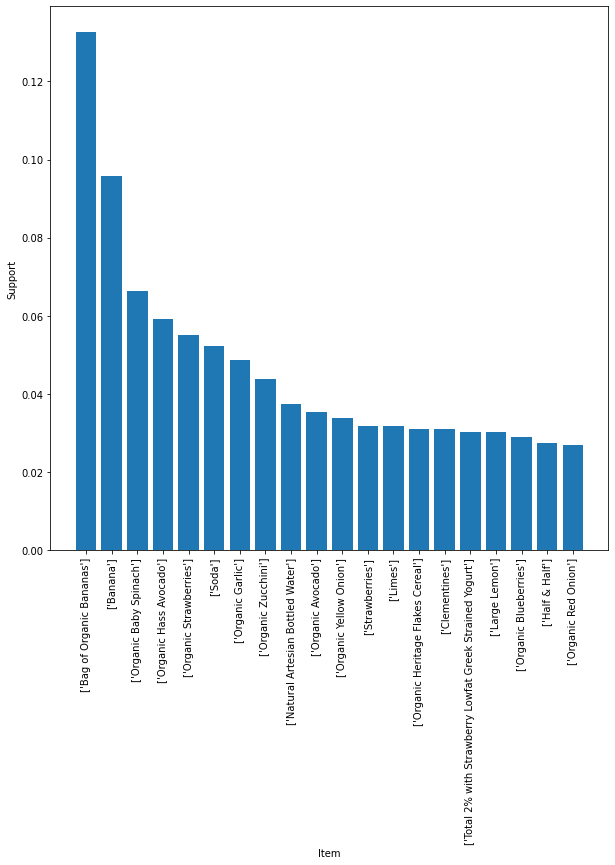

In [20]:
frequent_itemsets = apriori(df_set, min_support = 0.0045, use_colnames = True)
top_items = frequent_itemsets.sort_values('support', ascending = False)[:20]
for i in range(len(top_items.itemsets)):
    top_items.itemsets.iloc[i] = str(list(top_items.itemsets.iloc[i]))
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(top_items.itemsets, top_items.support)
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.xlabel('Item')
plt.ylabel('Support')

In [21]:
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0045)

In [22]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Apples),(0% Greek Strained Yogurt),0.015515,0.009873,0.006347,0.409091,41.435065,0.006194,1.675599
1,(0% Greek Strained Yogurt),(Apples),0.009873,0.015515,0.006347,0.642857,41.435065,0.006194,2.756559
2,(Bag of Organic Bananas),(0% Greek Strained Yogurt),0.132581,0.009873,0.007052,0.053191,5.387538,0.005743,1.045752
3,(0% Greek Strained Yogurt),(Bag of Organic Bananas),0.009873,0.132581,0.007052,0.714286,5.387538,0.005743,3.035966
4,(Soda),(0% Greek Strained Yogurt),0.052186,0.009873,0.006347,0.121622,12.318533,0.005832,1.127221
...,...,...,...,...,...,...,...,...,...
5857,(Dark Chocolate Minis),"(Sparkling Water, Natural Mango Essenced, Orga...",0.021157,0.005642,0.004937,0.233333,41.358333,0.004817,1.296989
5858,(Organic Graham Crunch Cereal),"(Dark Chocolate Minis, Sparkling Water, Natura...",0.014104,0.007757,0.004937,0.350000,45.118182,0.004827,1.526527
5859,(Organic Heritage Flakes Cereal),"(Dark Chocolate Minis, Sparkling Water, Natura...",0.031030,0.004937,0.004937,0.159091,32.227273,0.004783,1.183319
5860,(Peach-Pear Sparkling Water),"(Dark Chocolate Minis, Sparkling Water, Natura...",0.016925,0.005642,0.004937,0.291667,51.697917,0.004841,1.403800


In [23]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.009873,(0% Greek Strained Yogurt),1
1,0.004937,"(100% Juice, Variety Pack)",1
2,0.009168,(100% Premium Select Not From Concentrate Pure...,1
3,0.005642,(100% Recycled Paper Towels),1
4,0.014810,(1500 Pale Ale),1
...,...,...,...
1487,0.004937,"(Total 0% Nonfat Greek Yogurt, Total 2% with S...",5
1488,0.004937,"(Total 0% Nonfat Greek Yogurt, Total 2% with S...",5
1489,0.004937,(Total 2% with Strawberry Lowfat Greek Straine...,5
1490,0.005642,"(Orange Sparkling Water, Annie's Bunny Fruit S...",6


In [24]:
x = len(frequent_itemsets)
x

1492

In [32]:
 print(frequent_itemsets['itemsets'])

0                              (0% Greek Strained Yogurt)
1                              (100% Juice, Variety Pack)
2       (100% Premium Select Not From Concentrate Pure...
3                            (100% Recycled Paper Towels)
4                                         (1500 Pale Ale)
                              ...                        
1487    (Total 0% Nonfat Greek Yogurt, Total 2% with S...
1488    (Total 0% Nonfat Greek Yogurt, Total 2% with S...
1489    (Total 2% with Strawberry Lowfat Greek Straine...
1490    (Orange Sparkling Water, Annie's Bunny Fruit S...
1491    (Sparkling Water, Natural Mango Essenced, Dark...
Name: itemsets, Length: 1492, dtype: object
